In [ ]:
import pandas as pd
data=pd.read_csv('C:\\Users\\Shreya choudhary\\ecsvfile.txt', sep=" ",names=["Catalina_Surveys_ID","ID","RA_(J2000)"," Dec ","V_(mag)","Period_(days)","Amplitude","Number_Obs","Var_Type"])
data1=pd.read_csv('C:\\Users\\Shreya choudhary\\Downloads\\ttt\\ALLVar', sep=",",header=None ,names=["ID","MJD","Mag","Magerr","RA","Dec"])
result = data[['ID','Var_Type']].merge(data1[['ID','MJD','Mag']], on = 'ID',how = 'left')
result1=result.round({'Mag': 6})
result1.to_csv('merged.txt', encoding='utf-8',index=False)


In [ ]:
import os
import time
from sklearn.utils import shuffle

import cv2
import numpy as np
import matplotlib.pyplot as plt

from sklearn.metrics import confusion_matrix
import itertools

from lasagne import random as lasagne_random
from lasagne import layers
from lasagne.nonlinearities import softmax, tanh
from lasagne import objectives
from lasagne import updates

import theano
import theano.tensor as T

import warnings
warnings.filterwarnings("ignore")

In [3]:
(result1.loc[result1['Var_Type'] == 13]).to_csv('vartype_13_data.txt',encoding='utf-8',index=False)


In [4]:
import pandas as pd
data2=pd.read_csv('C:\\Users\\Shreya choudhary\\vartype_13_data.txt')
data3 = data2.groupby('ID')
data3.apply(lambda x: x.to_csv('ID' + str(x.name) + '.txt',index=False,header=None))

""


/home/dic/jupyter/var4_txtfiles/ID1018062006271.txt
0.16853932612118197
0.08426966306059099
0.08426966306059099
1.3904494404997512
0.8426966306059098
0.16853932612118197
1.1797752828482737
0.46348314683325037
0.16853932612118197
0.08426966306059099
0.12640449459088646
0.08426966306059099
0.12640449459088646
0.08426966306059099
0.04213483153029549
0.04213483153029549
0.04213483153029549
/home/dic/jupyter/var4_txtfiles/ID1160048034373.txt
0.09185878970808609
0.04592939485404304
1.0334113842159685
0.34447046140532284
0.04592939485404304
0.02296469742702152
0.7119056202376671
0.16075288198915064
0.11482348713510761
0.02296469742702152
0.04592939485404304
0.02296469742702152
/home/dic/jupyter/var4_txtfiles/ID1015048047345.txt
0.3960994138696918
0.1320331379565639
1.1442871956235539
0.9682430116814688
0.30807732189864917
0.9682430116814688
0.5281325518262556
0.08802209197104262
0.08802209197104262
0.3520883678841705
0.1320331379565639
0.1320331379565639
0.04401104598552131
0.0440110459855213

/home/dic/jupyter/var4_txtfiles/ID1104083002149.txt
0.12448470387407376
0.07607398570082285
0.027663267527571946
0.0069158168818929866
0.0069158168818929866
0.13831633763785972
0.07607398570082285
0.013831633763785973
0.0069158168818929866
0.11756888699218077
0.09682143634650181
0.02074745064567896
0.0069158168818929866
0.16597960516543167
0.06224235193703688
0.02074745064567896
0.07607398570082285
0.048410718173250905
0.013831633763785973
0.09682143634650181
0.06224235193703688
0.02074745064567896
0.0069158168818929866
0.0069158168818929866
0.03457908440946493
0.05532653505514389
0.02074745064567896
0.013831633763785973
0.0069158168818929866
0.0069158168818929866
0.0069158168818929866
0.06224235193703688
0.048410718173250905
0.02074745064567896
0.0069158168818929866
0.0069158168818929866
0.0069158168818929866
0.0069158168818929866
0.14523215451975272
0.08298980258271584
0.027663267527571946
0.13831633763785972
0.03457908440946493
0.013831633763785973
0.013831633763785973
0.00691581688

/home/dic/jupyter/var4_txtfiles/ID1146006052465.txt
0.07779133641791135
1.9447834104477835
1.5558267283582268
0.3889566820895567
1.4780353919403155
0.6223306913432908
0.3111653456716454
0.07779133641791135
0.1555826728358227
/home/dic/jupyter/var4_txtfiles/ID1107066048698.txt
0.10458357494867465
0.06130761290094721
0.03245697153579558
0.0036063301706439534
0.12622155597253837
0.0036063301706439534
0.06852027324223511
0.014425320682575814
0.007212660341287907
0.007212660341287907
0.12622155597253837
0.057701282730303255
0.03245697153579558
0.0036063301706439534
0.09737091460738674
0.06491394307159117
0.01803165085321977
0.06491394307159117
0.0036063301706439534
0.0036063301706439534
0.025244311194507676
0.007212660341287907
0.07212660341287908
0.039669631877083486
0.014425320682575814
0.0036063301706439534
0.0036063301706439534
0.0036063301706439534
0.025244311194507676
0.01081899051193186
0.007212660341287907
0.01081899051193186
0.007212660341287907
0.014425320682575814
0.0108189905119

/home/dic/jupyter/var4_txtfiles/ID1121109039581.txt
0.46425537136091194
0.15475179045363732
0.12380143236290986
0.4333050132701845
0.030950358090727464
0.21665250663509225
0.06190071618145493
0.27855322281654715
0.27855322281654715
0.06190071618145493
0.030950358090727464
0.030950358090727464
0.402354655179457
0.1857021485443648
0.030950358090727464
0.12380143236290986
0.0928510742721824
0.030950358090727464
0.21665250663509225
0.030950358090727464
0.06190071618145493
0.030950358090727464
0.06190071618145493
0.1857021485443648
0.06190071618145493
0.06190071618145493
0.15475179045363732
0.030950358090727464
0.030950358090727464
/home/dic/jupyter/var4_txtfiles/ID1007082047030.txt
0.13101426502992453
0.11560082208522754
0.015413442944697004
0.015413442944697004
0.13872098650227305
0.007706721472348502
0.08477393619583352
0.015413442944697004
0.015413442944697004
0.16954787239166705
0.007706721472348502
0.07706721472348502
0.015413442944697004
0.13872098650227305
0.08477393619583352
0.0308

/home/dic/jupyter/var4_txtfiles/ID1160039020231.txt
1.4736842135679755
0.6842105277279886
0.05263157905599913
0.8947368439519852
0.10526315811199825
0.3684210533919939
0.15789473716799737
0.05263157905599913
/home/dic/jupyter/var4_txtfiles/ID1140030043857.txt
0.04642597054036553
0.07856702706831088
0.0357122850310504
0.0035712285031050403
0.5142569044471258
0.24284353821114274
0.07499579856520584
0.007142457006210081
0.2214161671925125
0.09999439808694113
0.0357122850310504
0.024998599521735283
0.014284914012420161
0.0035712285031050403
0.01071368550931512
0.007142457006210081
0.02142737101863024
0.01071368550931512
0.0035712285031050403
0.01071368550931512
0.007142457006210081
0.007142457006210081
0.014284914012420161
0.007142457006210081
/home/dic/jupyter/var4_txtfiles/ID1163041015350.txt
1.7367109663400513
0.5506644527419675
0.08471760811414884
0.6777408649131907
0.12707641217122326
0.12707641217122326
0.04235880405707442
0.04235880405707442
0.08471760811414884
0.16943521622829769
0

/home/dic/jupyter/var4_txtfiles/ID1146058003184.txt
0.15084294596323156
0.10559006217426209
0.015084294596323156
0.015084294596323156
0.6033717838529262
0.25643300813749365
0.03016858919264631
0.04525288378896947
0.49778172167866414
0.22626441894484733
0.10559006217426209
0.015084294596323156
0.2413487135411705
0.18101153515587787
0.03016858919264631
0.04525288378896947
0.015084294596323156
0.03016858919264631
0.03016858919264631
0.015084294596323156
0.015084294596323156
0.06033717838529262
/home/dic/jupyter/var4_txtfiles/ID1004078020617.txt
0.10178015489257343
0.04749740561653427
0.01357068731900979
0.10178015489257343
0.006785343659504895
0.061068092935544056
0.04071206195702937
0.10178015489257343
0.08142412391405875
0.02714137463801958
0.1628482478281175
0.006785343659504895
0.061068092935544056
0.01357068731900979
0.10178015489257343
0.08142412391405875
0.02714137463801958
0.006785343659504895
0.07463878025455385
0.006785343659504895
0.04071206195702937
0.020356030978514687
0.0067

/home/dic/jupyter/var4_txtfiles/ID1138078028716.txt
0.38071878019660804
0.14956809222009604
0.04079129787820801
0.013597099292736002
0.3399274823184001
0.21755358868377603
0.05438839717094401
0.027194198585472003
0.42151007807481605
0.20395648939104002
0.04079129787820801
0.23115068797651203
0.05438839717094401
0.04079129787820801
0.04079129787820801
0.027194198585472003
0.027194198585472003
0.013597099292736002
0.013597099292736002
0.027194198585472003
0.013597099292736002
0.013597099292736002
0.08158259575641602
0.05438839717094401
0.013597099292736002
/home/dic/jupyter/var4_txtfiles/ID1009002014299.txt
0.16892311521091505
0.052788473503410954
0.02111538940136438
0.5067693456327451
0.2850577569184191
0.1161346417075041
0.052788473503410954
0.01055769470068219
0.5912309032382027
0.2850577569184191
0.06334616820409314
0.02111538940136438
0.02111538940136438
0.01055769470068219
0.01055769470068219
0.14780772580955068
0.14780772580955068
0.04223077880272876
0.04223077880272876
0.03167308

/home/dic/jupyter/var4_txtfiles/ID1001122027357.txt
0.1142418278875249
0.004080065281697318
0.05712091394376245
0.012240195845091954
0.15504248070449808
0.004080065281697318
0.004080065281697318
0.08568137091564368
0.040800652816973176
0.004080065281697318
0.1387222195777088
0.004080065281697318
0.05712091394376245
0.028560456971881226
0.004080065281697318
0.12240195845091953
0.004080065281697318
0.004080065281697318
0.07344117507055171
0.028560456971881226
0.004080065281697318
0.07344117507055171
0.06528104450715709
0.012240195845091954
0.044880718098670495
0.004080065281697318
0.020400326408486588
0.020400326408486588
0.004080065281697318
0.008160130563394636
0.004080065281697318
0.004080065281697318
0.020400326408486588
0.012240195845091954
0.004080065281697318
0.05712091394376245
0.004080065281697318
0.004080065281697318
0.004080065281697318
0.004080065281697318
0.008160130563394636
0.004080065281697318
0.032640522253578545
0.008160130563394636
0.07344117507055171
0.004080065281697

/home/dic/jupyter/var4_txtfiles/ID1101123041938.txt
0.004319471500689332
0.004319471500689332
0.4405860930703119
0.2548488185406706
0.07775048701240798
0.004319471500689332
0.4146692640661759
0.20733463203308794
0.07343101551171864
0.012958414502067996
0.004319471500689332
0.004319471500689332
0.004319471500689332
0.004319471500689332
0.008638943001378664
0.004319471500689332
0.004319471500689332
0.004319471500689332
0.004319471500689332
0.004319471500689332
0.004319471500689332
0.004319471500689332
0.004319471500689332
/home/dic/jupyter/var4_txtfiles/ID1009108126211.txt
0.3356735413949907
0.13986397558124614
0.13986397558124614
0.8391838534874768
0.5594559023249845
0.22378236092999382
0.8951294437199753
0.3077007462787415
0.055945590232498454
0.16783677069749536
0.13986397558124614
0.055945590232498454
0.055945590232498454
0.027972795116249227
0.055945590232498454
0.027972795116249227
0.055945590232498454
0.027972795116249227
/home/dic/jupyter/var4_txtfiles/ID1126086089789.txt
0.02269

/home/dic/jupyter/var4_txtfiles/ID1004074064126.txt
0.0067403256520248275
0.0067403256520248275
0.6672922395504579
0.3841985621654152
0.1213258617364469
0.02022097695607448
0.47182279564173796
0.0067403256520248275
0.02022097695607448
0.013480651304049655
0.0067403256520248275
0.0067403256520248275
0.22243074651681932
0.08762423347632275
0.0067403256520248275
0.0067403256520248275
0.013480651304049655
0.0067403256520248275
0.0067403256520248275
0.013480651304049655
0.0067403256520248275
0.0067403256520248275
/home/dic/jupyter/var4_txtfiles/ID1015083016862.txt
0.05010315360065149
0.17536103760228022
0.025051576800325746
1.0521662256136812
0.4509283824058634
0.12525788400162874
0.5511346896071664
0.10020630720130298
0.025051576800325746
0.10020630720130298
0.025051576800325746
0.15030946080195448
0.025051576800325746
0.07515473040097724
0.05010315360065149
0.07515473040097724
0.05010315360065149
0.025051576800325746
/home/dic/jupyter/var4_txtfiles/ID1012057046454.txt
0.013616703163142363

/home/dic/jupyter/var4_txtfiles/ID1007083011487.txt
0.12053887973817026
0.06887935985038302
0.008609919981297877
0.017219839962595754
0.18941823958855328
0.12914879971946813
0.008609919981297877
0.20663807955114902
0.008609919981297877
0.008609919981297877
0.008609919981297877
0.06887935985038302
0.025829759943893627
0.025829759943893627
0.08609919981297876
0.008609919981297877
0.008609919981297877
0.008609919981297877
0.008609919981297877
0.008609919981297877
0.06026943986908513
0.017219839962595754
0.017219839962595754
0.08609919981297876
0.017219839962595754
0.025829759943893627
0.008609919981297877
0.008609919981297877
0.12914879971946813
0.008609919981297877
0.008609919981297877
0.06887935985038302
0.017219839962595754
0.025829759943893627
0.08609919981297876
0.06887935985038302
0.04304959990648938
0.008609919981297877
0.008609919981297877
0.008609919981297877
0.008609919981297877
0.051659519887787254
0.06026943986908513
0.03443967992519151
0.008609919981297877
0.00860991998129787

/home/dic/jupyter/var4_txtfiles/ID1007088041164.txt
0.1612628609348048
0.006202417728261723
0.006202417728261723
0.09303626592392583
0.018607253184785167
0.006202417728261723
0.28531121550003924
0.15506044320654305
0.04961934182609378
0.3101208864130861
0.11784593683697273
0.04341692409783206
0.006202417728261723
0.1302507722934962
0.06202417728261723
0.012404835456523445
0.037214506369570334
0.04341692409783206
0.018607253184785167
0.018607253184785167
0.006202417728261723
0.006202417728261723
0.006202417728261723
0.006202417728261723
0.006202417728261723
0.018607253184785167
0.006202417728261723
0.012404835456523445
0.012404835456523445
0.006202417728261723
0.006202417728261723
0.012404835456523445
0.006202417728261723
0.04961934182609378
0.031012088641308614
0.02480967091304689
0.012404835456523445
/home/dic/jupyter/var4_txtfiles/ID1112021052664.txt
0.1400043923166224
0.060001882421409594
0.01600050197904256
0.25600803166468095
0.17600552176946815
0.06400200791617024
0.0080002509895

/home/dic/jupyter/var4_txtfiles/ID1009087017436.txt
0.1510333863745857
0.10333863278261125
0.007949125598662404
0.3895071543344578
0.18282988876923528
0.06359300478929923
0.031796502394649616
0.413354531130445
0.1510333863745857
0.10333863278261125
0.19077901436789768
0.11923688397993606
0.007949125598662404
0.031796502394649616
0.02384737679598721
0.007949125598662404
0.031796502394649616
0.031796502394649616
0.031796502394649616
0.015898251197324808
0.007949125598662404
0.04769475359197442
0.007949125598662404
/home/dic/jupyter/var4_txtfiles/ID1015067016389.txt
0.1857697912735368
0.1702889753340754
0.07740407969730699
0.015480815939461398
0.6966367172757629
0.46442447818384197
0.0928848956367684
0.030961631878922796
0.5727901897600718
0.1702889753340754
0.0464424478183842
0.015480815939461398
0.1857697912735368
0.07740407969730699
0.0464424478183842
0.0928848956367684
0.10836571157622979
0.015480815939461398
0.0464424478183842
0.0464424478183842
0.015480815939461398
/home/dic/jupyter

/home/dic/jupyter/var4_txtfiles/ID1018064013504.txt
0.6307977756054354
0.15769944390135884
0.07884972195067942
1.6558441609642678
1.103896107309512
0.4730983317040765
1.103896107309512
0.551948053654756
0.07884972195067942
0.3942486097533971
0.15769944390135884
/home/dic/jupyter/var4_txtfiles/ID1138079082509.txt
0.5606860170639534
0.168205805119186
0.11213720341279068
0.7849604238895348
0.22427440682558136
1.2335092375406975
0.3924802119447674
0.05606860170639534
0.2803430085319767
0.168205805119186
0.05606860170639534
0.05606860170639534
0.168205805119186
0.11213720341279068
0.05606860170639534
0.336411610238372
0.11213720341279068
/home/dic/jupyter/var4_txtfiles/ID1015051049819.txt
0.37431192694891
0.35091743151460314
0.0935779817372275
0.6550458721605925
0.23394495434306875
0.04678899086861375
0.023394495434306876
0.6082568812919787
0.2807339452116825
0.0935779817372275
0.16376146804014813
0.16376146804014813
0.07018348630292062
0.0935779817372275
0.07018348630292062
0.0233944954343

/home/dic/jupyter/var4_txtfiles/ID1107089025221.txt
0.127261384925989
0.004545049461642465
0.004545049461642465
0.07272079138627945
0.01818019784656986
0.00909009892328493
0.19998217631226847
0.00909009892328493
0.00909009892328493
0.00909009892328493
0.0772658408479219
0.00909009892328493
0.00909009892328493
0.18634702792734106
0.004545049461642465
0.004545049461642465
0.01818019784656986
0.00909009892328493
0.08181089030956437
0.040905445154782186
0.004545049461642465
0.1181712860027041
0.004545049461642465
0.004545049461642465
0.004545049461642465
0.06817574192463698
0.013635148384927395
0.0636306924629945
0.004545049461642465
0.02727029676985479
0.00909009892328493
0.03181534623149725
0.004545049461642465
0.01818019784656986
0.004545049461642465
0.004545049461642465
0.004545049461642465
0.004545049461642465
0.004545049461642465
0.004545049461642465
0.004545049461642465
0.004545049461642465
0.045450494616424655
0.02727029676985479
0.08635593977120684
0.04999554407806712
0.0045450494

/home/dic/jupyter/var4_txtfiles/ID1015113031466.txt
0.15616627126706442
0.1756870551754475
0.039041567816766105
0.019520783908383053
0.351374110350895
0.13664548735868137
0.09760391954191527
0.4489780298928102
0.27329097471736274
0.07808313563353221
0.039041567816766105
0.05856235172514916
0.15616627126706442
0.13664548735868137
0.05856235172514916
0.09760391954191527
0.09760391954191527
0.039041567816766105
0.2147286229922136
0.07808313563353221
0.019520783908383053
0.019520783908383053
0.05856235172514916
0.019520783908383053
0.019520783908383053
0.019520783908383053
0.05856235172514916
0.05856235172514916
0.039041567816766105
0.019520783908383053
0.19520783908383055
0.05856235172514916
/home/dic/jupyter/var4_txtfiles/ID1009077059587.txt
0.2632122214405513
0.17108794393635834
0.05264244428811026
0.4343001653769097
0.2632122214405513
0.10528488857622052
0.02632122214405513
0.5395850539531302
0.25005161036852375
0.07896366643216539
0.15792733286433078
0.07896366643216539
0.039481833216

/home/dic/jupyter/var4_txtfiles/ID1121087016038.txt
0.09057661190724964
0.010064067989694404
0.013418757319592538
0.013418757319592538
0.0033546893298981345
0.0033546893298981345
0.04361096128867575
0.0033546893298981345
0.0033546893298981345
0.0033546893298981345
0.006709378659796269
0.3287595543300172
0.006709378659796269
0.016773446649490674
0.006709378659796269
0.010064067989694404
0.0033546893298981345
0.20799073845368435
0.05367502927837015
0.0033546893298981345
0.0033546893298981345
0.006709378659796269
0.2717298357217489
0.006709378659796269
0.0033546893298981345
0.006709378659796269
0.006709378659796269
0.0972859905670459
0.03354689329898135
0.06373909726806455
0.006709378659796269
0.0033546893298981345
0.03690158262887948
0.010064067989694404
0.013418757319592538
0.0033546893298981345
0.0033546893298981345
0.0033546893298981345
0.0033546893298981345
0.0033546893298981345
0.0033546893298981345
0.0033546893298981345
0.0033546893298981345
0.023482825309286942
0.00335468932989813

/home/dic/jupyter/var4_txtfiles/ID1015087046331.txt
0.4480830678084394
0.2851437704235523
0.12220447303866529
0.6517571895395482
0.3258785947697741
0.12220447303866529
0.69249201388577
0.3666134191159959
0.20367412173110883
0.40734824346221765
0.24440894607733057
0.16293929738488705
0.12220447303866529
0.08146964869244352
0.08146964869244352
0.04073482434622176
0.12220447303866529
0.08146964869244352
0.04073482434622176
0.3666134191159959
0.12220447303866529
0.08146964869244352
/home/dic/jupyter/var4_txtfiles/ID1163045045718.txt
0.03471276890105196
1.527361831646286
0.4859787646147274
0.03471276890105196
0.798393684724195
0.13885107560420784
0.03471276890105196
0.03471276890105196
/home/dic/jupyter/var4_txtfiles/ID1109067010037.txt
0.11025388119472158
0.0034454337873350495
0.0757995433213711
0.020672602724010298
0.0034454337873350495
0.0034454337873350495
0.15848995421741227
0.0034454337873350495
0.0034454337873350495
0.11369931498205664
0.024118036511345347
0.0034454337873350495
0.148

/home/dic/jupyter/var4_txtfiles/ID1140054051180.txt
0.18811178895960046
0.00723506880613848
0.01447013761227696
0.02170520641841544
0.00723506880613848
0.00723506880613848
0.10852603209207719
0.02170520641841544
0.3834586467253394
0.00723506880613848
0.00723506880613848
0.00723506880613848
0.00723506880613848
0.01447013761227696
0.00723506880613848
0.15193644492890807
0.09405589447980023
0.3545183715007855
0.23152220179643135
0.04341041283683088
0.01447013761227696
0.13746630731663112
0.00723506880613848
0.00723506880613848
0.0723506880613848
0.02894027522455392
0.01447013761227696
0.00723506880613848
0.04341041283683088
0.00723506880613848
0.01447013761227696
0.00723506880613848
0.02170520641841544
0.00723506880613848
0.01447013761227696
0.01447013761227696
0.00723506880613848
0.00723506880613848
0.00723506880613848
0.00723506880613848
0.0361753440306924
0.01447013761227696
0.00723506880613848
0.00723506880613848
0.00723506880613848
0.01447013761227696
0.01447013761227696
/home/dic/ju

0.13501216104419533
0.05062956039157325
0.016876520130524417
0.08860173068525319
0.04641043035894215
0.016876520130524417
0.08860173068525319
0.08016347061999098
0.012657390097893313
0.1012591207831465
0.05484869042420436
0.012657390097893313
0.008438260065262208
0.06750608052209767
0.02953391022841773
0.016876520130524417
0.004219130032631104
0.11391651088103982
0.04219130032631104
0.012657390097893313
0.004219130032631104
0.05484869042420436
0.012657390097893313
0.004219130032631104
0.004219130032631104
0.004219130032631104
0.004219130032631104
0.004219130032631104
0.012657390097893313
0.004219130032631104
0.05062956039157325
0.02953391022841773
0.012657390097893313
0.004219130032631104
0.08438260065262208
0.03375304026104883
0.016876520130524417
0.004219130032631104
0.04641043035894215
0.04641043035894215
0.012657390097893313
/home/dic/jupyter/var4_txtfiles/ID1101111050273.txt
0.0858875044994527
0.0858875044994527
2.318962621485223
1.3742000719912433
0.2576625134983581
1.54597508099

/home/dic/jupyter/var4_txtfiles/ID1123020005857.txt
0.05568658282138509
0.005568658282138509
0.016705974846415526
0.016705974846415526
0.08352987423207764
0.005568658282138509
0.05568658282138509
0.011137316564277019
0.005568658282138509
0.07796121594993913
0.05011792453924658
0.022274633128554037
0.0668238993856621
0.005568658282138509
0.005568658282138509
0.038980607974969564
0.0668238993856621
0.05011792453924658
0.011137316564277019
0.0612552411035236
0.005568658282138509
0.005568658282138509
0.005568658282138509
0.07239255766780062
0.027843291410692545
0.1336477987713242
0.005568658282138509
0.011137316564277019
0.005568658282138509
0.08352987423207764
0.022274633128554037
0.005568658282138509
0.011137316564277019
0.005568658282138509
0.005568658282138509
0.005568658282138509
0.005568658282138509
0.05011792453924658
0.022274633128554037
0.1336477987713242
0.044549266257108075
0.027843291410692545
0.1225104822070472
0.005568658282138509
0.038980607974969564
0.005568658282138509
0.0

/home/dic/jupyter/var4_txtfiles/ID1163041037738.txt
0.08471760811414884
1.7790697703971259
0.5930232567990419
0.04235880405707442
0.6353820608561164
0.21179402028537211
0.04235880405707442
0.12707641217122326
0.12707641217122326
0.29651162839952094
0.21179402028537211
0.04235880405707442
/home/dic/jupyter/var4_txtfiles/ID1121089043236.txt
0.1933038535242383
0.09665192676211914
0.02147820594713759
0.3973468100220454
0.15034744162996314
0.04295641189427518
0.010739102973568795
0.010739102973568795
0.4080859129956142
0.23626026541851347
0.04295641189427518
0.1825647505506695
0.09665192676211914
0.02147820594713759
0.02147820594713759
0.010739102973568795
0.02147820594713759
0.010739102973568795
0.07517372081498157
0.02147820594713759
0.02147820594713759
/home/dic/jupyter/var4_txtfiles/ID1155034031701.txt
0.0761739754308603
0.01523479508617206
0.01523479508617206
0.01523479508617206
0.06093918034468824
0.01523479508617206
0.7922093444809472
0.3046959017234412
0.03046959017234412
0.04570438

/home/dic/jupyter/var4_txtfiles/ID1138098006839.txt
0.2433206111513752
0.29198473338165026
0.04866412223027504
0.7299618334541256
0.29198473338165026
0.14599236669082513
0.04866412223027504
0.34064885561192526
0.3893129778422003
0.09732824446055008
0.04866412223027504
0.5353053445330255
0.19465648892110016
0.14599236669082513
0.43797710007247537
0.19465648892110016
0.04866412223027504
0.2433206111513752
0.09732824446055008
0.04866412223027504
0.09732824446055008
0.04866412223027504
0.19465648892110016
0.04866412223027504
0.04866412223027504
0.2433206111513752
0.04866412223027504
/home/dic/jupyter/var4_txtfiles/ID1126054023862.txt
0.12062903536669808
0.05542415138469912
0.01630122099549974
0.26081953592799584
0.13367001216309787
0.035862686190099434
0.006520488398199896
0.24451831493249612
0.14671098895949766
0.05216390718559917
0.006520488398199896
0.0815061049774987
0.05868439558379907
0.01630122099549974
0.003260244199099948
0.035862686190099434
0.01956146519459969
0.0032602441990999

/home/dic/jupyter/var4_txtfiles/ID1126088121465.txt
0.35269709604546523
0.26452282203409894
0.17634854802273262
1.4989626581932272
0.6172199180795641
0.13226141101704947
0.7053941920909305
0.30860995903978206
0.044087137005683154
0.30860995903978206
0.044087137005683154
0.08817427401136631
0.08817427401136631
0.044087137005683154
0.044087137005683154
0.044087137005683154
0.044087137005683154
0.044087137005683154
0.044087137005683154
/home/dic/jupyter/var4_txtfiles/ID1109059037090.txt
0.10827003822998067
0.00401000141592521
0.06817002407072857
0.02005000707962605
0.00401000141592521
0.10426003681405546
0.00401000141592521
0.00401000141592521
0.00401000141592521
0.07218002548665378
0.01604000566370084
0.00401000141592521
0.12832004530960672
0.00401000141592521
0.00401000141592521
0.00802000283185042
0.07218002548665378
0.00802000283185042
0.00802000283185042
0.10025003539813025
0.00401000141592521
0.05213001840702773
0.01203000424777563
0.07218002548665378
0.00401000141592521
0.004010001

/home/dic/jupyter/var4_txtfiles/ID1012072039188.txt
0.821796179033114
0.5534545695529135
0.15094215533261277
0.05869972707379385
0.008385675296256265
0.45282646599783827
0.18448485651763782
0.08385675296256265
0.008385675296256265
0.01677135059251253
0.008385675296256265
/home/dic/jupyter/var4_txtfiles/ID1160044046187.txt
0.03965785387194067
1.7846034242373303
0.7534992235668728
0.11897356161582202
0.6345256619510508
0.07931570774388134
0.1586314154877627
0.03965785387194067
0.03965785387194067
0.03965785387194067
/home/dic/jupyter/var4_txtfiles/ID1001073047159.txt
0.09030907923062108
0.08209916293692826
0.0328396651747713
0.01641983258738565
0.1559884095801637
0.14777849328647086
0.04104958146846413
0.008209916293692825
0.2627173213981704
0.10672891181800673
0.049259497762156955
0.20524790734232065
0.04104958146846413
0.024629748881078477
0.008209916293692825
0.12314874440539238
0.08209916293692826
0.0328396651747713
0.008209916293692825
0.0656793303495426
0.05746941405584978
0.024629

/home/dic/jupyter/var4_txtfiles/ID1132078018498.txt
0.10618510911473338
0.07786908001747114
0.014158014548631116
0.24776525460104454
0.13096163457483784
0.03893454000873557
0.003539503637157779
0.240686247326729
0.1345011382119956
0.035395036371577794
0.003539503637157779
0.003539503637157779
0.09556659820326004
0.03893454000873557
0.003539503637157779
0.04601354728305113
0.017697518185788897
0.007079007274315558
0.003539503637157779
0.021237021822946674
0.021237021822946674
0.007079007274315558
0.003539503637157779
0.021237021822946674
0.007079007274315558
0.003539503637157779
/home/dic/jupyter/var4_txtfiles/ID1115087028590.txt
0.11184052292862871
0.003607758804149313
0.007215517608298626
0.003607758804149313
0.03968534684564244
0.014431035216597252
0.2669741515070492
0.003607758804149313
0.007215517608298626
0.003607758804149313
0.003607758804149313
0.003607758804149313
0.14791811097012184
0.04690086445394107
0.003607758804149313
0.23450432226970536
0.003607758804149313
0.00721551760

/home/dic/jupyter/var4_txtfiles/ID1101082028733.txt
0.06342156690830399
0.036240895376173705
0.018120447688086853
0.009060223844043426
0.09060223844043426
0.04530111922021713
0.02718067153213028
0.15402380534873825
0.05436134306426056
0.018120447688086853
0.07248179075234741
0.036240895376173705
0.02718067153213028
0.009060223844043426
0.11778290997256455
0.07248179075234741
0.15402380534873825
0.07248179075234741
0.036240895376173705
0.09060223844043426
0.06342156690830399
0.009060223844043426
0.018120447688086853
0.009060223844043426
0.009060223844043426
0.009060223844043426
0.02718067153213028
0.018120447688086853
0.15402380534873825
0.08154201459639084
0.036240895376173705
0.08154201459639084
0.05436134306426056
0.009060223844043426
0.009060223844043426
0.11778290997256455
0.036240895376173705
0.009060223844043426
0.009060223844043426
/home/dic/jupyter/var4_txtfiles/ID1109013037766.txt
0.1307140272978875
0.0615124834343
0.0076890604292875
0.0076890604292875
0.20760463159076248
0.12

/home/dic/jupyter/var4_txtfiles/ID1140095011915.txt
0.20656136129315786
0.1549210209698684
0.10328068064657893
1.3426488484055261
0.774605104849342
0.20656136129315786
1.1877278274356577
0.6713244242027631
0.1549210209698684
0.051640340323289464
0.25820170161644734
0.10328068064657893
0.051640340323289464
0.051640340323289464
0.051640340323289464
0.051640340323289464
0.051640340323289464
/home/dic/jupyter/var4_txtfiles/ID1001044045875.txt
0.8561516084877652
0.5707677389918434
0.11415354779836868
0.019025591299728115
0.9893307475858619
0.5517421476921153
0.20928150429700926
0.05707677389918434
0.019025591299728115
0.05707677389918434
0.019025591299728115
/home/dic/jupyter/var4_txtfiles/ID1157030048435.txt
0.22686832773853546
0.11343416386926773
0.7562277591284515
0.30249110365138066
0.03781138795642258
0.7940391470848741
0.07562277591284516
0.03781138795642258
0.3403024916078032
0.18905693978211288
0.15124555182569033
0.03781138795642258
0.03781138795642258
0.03781138795642258
0.1134341

/home/dic/jupyter/var4_txtfiles/ID1012083036961.txt
0.19230769240437792
0.1794871795774194
0.025641025653917057
0.025641025653917057
0.4871794874244241
0.12820512826958527
0.07692307696175117
0.051282051307834114
0.012820512826958529
0.5384615387322582
0.25641025653917054
0.07692307696175117
0.038461538480875586
0.012820512826958529
0.12820512826958527
0.0897435897887097
0.051282051307834114
0.012820512826958529
0.07692307696175117
0.051282051307834114
0.012820512826958529
0.012820512826958529
0.012820512826958529
0.012820512826958529
0.012820512826958529
0.025641025653917057
0.025641025653917057
0.012820512826958529
0.038461538480875586
0.051282051307834114
0.012820512826958529
/home/dic/jupyter/var4_txtfiles/ID1007077038918.txt
0.16445044994762475
0.031323895228119
0.031323895228119
0.10180265949138674
0.05481681664920825
0.0156619476140595
0.00783097380702975
0.05481681664920825
0.07047876426326774
0.0156619476140595
0.00783097380702975
0.14878850233356525
0.031323895228119
0.007830

/home/dic/jupyter/var4_txtfiles/ID1126115022356.txt
0.4013006959294099
0.20306782203656887
0.06768927401218962
0.014504844431183491
0.00966989628745566
0.01933979257491132
0.00966989628745566
0.42547543664804904
0.00483494814372783
0.2224076146114802
0.07252422215591746
0.00483494814372783
0.00966989628745566
0.01933979257491132
0.00483494814372783
0.00966989628745566
0.00483494814372783
0.00966989628745566
0.00966989628745566
0.00966989628745566
0.00483494814372783
0.00966989628745566
0.00483494814372783
0.00483494814372783
0.00483494814372783
/home/dic/jupyter/var4_txtfiles/ID1018063007628.txt
0.5338450821139047
0.3558967214092698
2.3133286891602536
0.7117934428185396
0.5338450821139047
1.0676901642278094
1.1566643445801268
0.26692254105695234
0.26692254105695234
/home/dic/jupyter/var4_txtfiles/ID1160027051138.txt
0.04893494535495581
1.247841106551373
0.24467472677477906
0.7829591256792929
0.3180771448072128
0.07340241803243372
0.04893494535495581
0.04893494535495581
0.02446747267747

/home/dic/jupyter/var4_txtfiles/ID1132056020236.txt
0.09183012030149813
0.06734208822109863
0.03673204812059925
0.1285621684220974
0.09183012030149813
0.0244880320803995
0.006122008020099875
0.16529421654269663
0.048976064160799
0.0244880320803995
0.006122008020099875
0.1224401604019975
0.06734208822109863
0.018366024060299625
0.06122008020099875
0.06122008020099875
0.01224401604019975
0.14080618446229712
0.05509807218089888
0.01224401604019975
0.04285405614069913
0.030610040100499374
0.006122008020099875
0.006122008020099875
0.0734640962411985
0.10407413634169788
0.07958610426129838
0.01224401604019975
0.097952128321598
0.05509807218089888
0.018366024060299625
0.006122008020099875
/home/dic/jupyter/var4_txtfiles/ID1109093002262.txt
0.04264214053953535
0.0852842810790707
1.6204013405023434
0.8954849513302423
0.1705685621581414
0.0852842810790707
0.8102006702511717
0.2558528432372121
0.0852842810790707
0.12792642161860604
0.12792642161860604
0.04264214053953535
0.0852842810790707
0.0426

/home/dic/jupyter/var4_txtfiles/ID1160050045746.txt
0.08811333804205636
0.029371112680685454
1.6447823101183854
0.5286800282523382
0.05874222536137091
0.05874222536137091
0.46993780289096726
0.14685556340342729
0.029371112680685454
0.029371112680685454
/home/dic/jupyter/var4_txtfiles/ID1004079028190.txt
0.123670091880716
0.00772938074254475
0.030917522970179
0.0154587614850895
0.00772938074254475
0.10048194965308174
0.03864690371272375
0.00772938074254475
0.13139947262326074
0.00772938074254475
0.061835045940358
0.05410566519781325
0.00772938074254475
0.1391288533658055
0.0772938074254475
0.030917522970179
0.05410566519781325
0.00772938074254475
0.03864690371272375
0.00772938074254475
0.1082113303956265
0.00772938074254475
0.08502318816799224
0.0154587614850895
0.1391288533658055
0.03864690371272375
0.06956442668290275
0.0154587614850895
0.00772938074254475
0.00772938074254475
0.0154587614850895
0.10048194965308174
0.10048194965308174
0.02318814222763425
0.00772938074254475
0.185505137

/home/dic/jupyter/var4_txtfiles/ID1143074013735.txt
0.13556618855812386
1.8979266398137338
1.0845295084649909
0.2711323771162477
1.4234449798603004
0.5422647542324954
0.20334928283718576
/home/dic/jupyter/var4_txtfiles/ID1101019049730.txt
0.11795362034629851
0.07470395955265573
0.035386086103889554
0.17693043051944776
0.003931787344876617
0.003931787344876617
0.003931787344876617
0.09829468362191543
0.019658936724383087
0.003931787344876617
0.003931787344876617
0.19265757989895424
0.07077217220777911
0.04324966079364279
0.003931787344876617
0.003931787344876617
0.1140218330014219
0.003931787344876617
0.003931787344876617
0.003931787344876617
0.003931787344876617
0.003931787344876617
0.07470395955265573
0.019658936724383087
0.007863574689753234
0.08649932158728559
0.007863574689753234
0.035386086103889554
0.019658936724383087
0.003931787344876617
0.04324966079364279
0.003931787344876617
0.003931787344876617
0.023590724069259703
0.011795362034629851
0.003931787344876617
0.007863574689753

KeyboardInterrupt: 

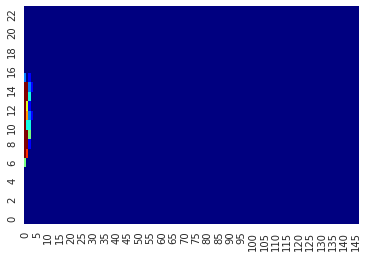

In [6]:
import pandas as pd
import glob
import numpy as np

#l = [pd.read_csv(filename) for filename in glob.glob("C:\\Users\\Shreya choudhary\\variable type\\*.txt")]

file_list = glob.glob("/home/dic/jupyter/var4_txtfiles" + "/*.txt") #Get folder path containing text files

#print(file_list)
d=1
for file_path in file_list:
    print(file_path)
    ID,Var_Type,MJD,Mag=np.loadtxt(file_path, unpack=True, delimiter=',')
    c=[]
    e=[]
    for i in range(0,len(Mag)):
        for j in range(i+1,len(Mag)):
            c.append(Mag[i]-Mag[j])
    #print(c)   
    for i in range(0,len(MJD)):
        for j in range(i+1,len(MJD)):
            e.append(MJD[j]-MJD[i])
    #print(e)
    s1 = pd.Series(c, name='dm_y')

    s2 = pd.Series(e,name='dt_x')



#Assigning bins to all dmdt values

    bins=[-8,-5,-3,-2.5,-2,-1.5,-1,-0.5,-0.3,-0.2,-0.1,0,0.1,0.2,0.3,0.5,1,1.5,2,2.5,3,5,8]
    #bins1=[0,10,20,30,40,50,60,70,80,90,100,110,120,130,140,150,160,170,180,190,200,210,220,230,240,250,260,270,280,290,300,310,320,330,340,350,360,370,380,390,400,410,420,430,440,450,460,470,480,490,500,510,520,530,540,550,560,570,580,590,600,610,620,630,640,650,660,670,680,690,700,710,720,730,740,750,760,770,780,790,800,810,820,830,840,850,860,870,880,890,900,910,920,930,940,950,960,970,980,990,1000,1010,1020,1030,1040,1050,1060,1070,1080,1090,1100,1110,1120,1130,1140,1150,1160,1170,1180,1190,1200,1210,1220,1230,1240,1250,1260,1270,1280,1290,1300,1310,1320,1330,1340,1350,1360,1370,1380,1390,1400,1410,1420,1430,1440,1450,1460,1470,1480,1490,1500,1510,1520,1530,1540,1550,1560,1570,1580,1590,1600,1610,1620,1630,1640,1650,1660,1670,1680,1690,1700,1710,1720,1730,1740,1750,1760,1770,1780,1790,1800,1810,1820,1830,1840,1850,1860,1870,1880,1890,1900,1910,1920,1930,1940,1950,1960,1970,1980,1990,2000,2010,2020,2030,2040,2050,2060,2070,2080,2090,2100,2110,2120,2130,2140,2150,2160,2170,2180,2190,2200,2210,2220,2230,2240,2250,2260,2270,2280,2290,2300,2310,2320,2330,2340,2350,2360,2370,2380,2390,2400,2410,2420,2430,2440,2450,2460,2470,2480,2490,2500,2510,2520,2530,2540,2550,2560,2570,2580,2590,2600,2610,2620,2630,2640,2650,2660,2670,2680,2690,2700,2710,2720,2730,2740,2750,2760,2770,2780,2790,2800,2810,2820,2830,2840,2850,2860,2870] #bins of x axis
    #bins1=[1 / 144,2 / 144,3 / 144,4 / 144,5 / 144,6 / 144,7 / 144,8 / 144,9 / 144,10 / 144,11 / 144,12 / 144,13 / 144,14 / 144,15 / 144,16 / 144,17 / 144,18 / 144,19 / 144,20 / 144,21 / 144,22 / 144,23 / 144,24 / 144,25 / 144,26 / 144,27 / 144,28 / 144,29 / 144,30 / 144,31 / 144,32 / 144,33 / 144,34 / 144,35 / 144,36 / 144,37 / 144,38 / 144,39 / 144,40 / 144,41 / 144,42 / 144,43 / 144,44 / 144,45 / 144,46 / 144,47 / 144,48 / 144,49 / 144,50 / 144,51 / 144,52 / 144,53 / 144,54 / 144,55 / 144,56 / 144,57 / 144,58 / 144,59 / 144,60 / 144,61 / 144,62 / 144,63 / 144,64 / 144,65 / 144,66 / 144,67 / 144,68 / 144,69 / 144,70 / 144,71 / 144,72 / 144,73 / 144,74 / 144,75 / 144,76 / 144,77 / 144,78 / 144,79 / 144,80 / 144,81 / 144,82 / 144,83 / 144,84 / 144,85 / 144,86 / 144,87 / 144,88 / 144,89 / 144,90 / 144,91 / 144,92 / 144,93 / 144,94 / 144,95 / 144,96 / 144,97 / 144,98 / 144,99 / 144,100 / 144,101 / 144,102 / 144,103 / 144,104 / 144,105 / 144,106 / 144,107 / 144,108 / 144,109 / 144,110 / 144,111 / 144,112 / 144,113 / 144,114 / 144,115 / 144,116 / 144,117 / 144,118 / 144,119 / 144,120 / 144,121 / 144,122 / 144,123 / 144,124 / 144,125 / 144,126 / 144,127 / 144,128 / 144,129 / 144,130 / 144,131 / 144,132 / 144,133 / 144,134 / 144,135 / 144,136 / 144,137 / 144,138 / 144,139 / 144,140 / 144,141 / 144,142 / 144,143 / 144,144 / 144,145 / 144,146 / 144,147 / 144,148 / 144,149 / 144,150 / 144,151 / 144,152 / 144,153 / 144,154 / 144,155 / 144,156 / 144,157 / 144,158 / 144,159 / 144,160 / 144,161 / 144,162 / 144,163 / 144,164 / 144,165 / 144,166 / 144,167 / 144,168 / 144,169 / 144,170 / 144,171 / 144,172 / 144,173 / 144,174 / 144,175 / 144,176 / 144,177 / 144,178 / 144,179 / 144,180 / 144,181 / 144,182 / 144,183 / 144,184 / 144,185 / 144,186 / 144,187 / 144,188 / 144,189 / 144,190 / 144,191 / 144,192 / 144,193 / 144,194 / 144,195 / 144,196 / 144,197 / 144,198 / 144,199 / 144,200 / 144,201 / 144,202 / 144,203 / 144,204 / 144,205 / 144,206 / 144,207 / 144,208 / 144,209 / 144,210 / 144,211 / 144,212 / 144,213 / 144,214 / 144,215 / 144,216 / 144,217 / 144,218 / 144,219 / 144,220 / 144,221 / 144,222 / 144,223 / 144,224 / 144,225 / 144,226 / 144,227 / 144,228 / 144,229 / 144,230 / 144,231 / 144,232 / 144,233 / 144,234 / 144,235 / 144,236 / 144,237 / 144,238 / 144,239 / 144,240 / 144,241 / 144,242 / 144,243 / 144,244 / 144,245 / 144,246 / 144,247 / 144,248 / 144,249 / 144,250 / 144,251 / 144,252 / 144,253 / 144,254 / 144,255 / 144,256 / 144,257 / 144,258 / 144,259 / 144,260 / 144,261 / 144,262 / 144,263 / 144,264 / 144,265 / 144,266 / 144,267 / 144,268 / 144,269 / 144,270 / 144,271 / 144,272 / 144,273 / 144,274 / 144,275 / 144,276 / 144,277 / 144,278 / 144,279 / 144,280 / 144,281 / 144,282 / 144,283 / 144,284 / 144,285 / 144,286 / 144,287 / 144,288 / 144]
    bins1=[1 / 144,2 / 144,3 / 144,4 / 144,5 / 144,6 / 144,7 / 144,8 / 144,9 / 144,10 / 144,11 / 144,12 / 144,13 / 144,14 / 144,15 / 144,16 / 144,17 / 144,18 / 144,19 / 144,20 / 144,21 / 144,22 / 144,23 / 144,24 / 144,25 / 144,26 / 144,27 / 144,28 / 144,29 / 144,30 / 144,31 / 144,32 / 144,33 / 144,34 / 144,35 / 144,36 / 144,37 / 144,38 / 144,39 / 144,40 / 144,41 / 144,42 / 144,43 / 144,44 / 144,45 / 144,46 / 144,47 / 144,48 / 144,49 / 144,50 / 144,51 / 144,52 / 144,53 / 144,54 / 144,55 / 144,56 / 144,57 / 144,58 / 144,59 / 144,60 / 144,61 / 144,62 / 144,63 / 144,64 / 144,65 / 144,66 / 144,67 / 144,68 / 144,69 / 144,70 / 144,71 / 144,72 / 144,73 / 144,74 / 144,75 / 144,76 / 144,77 / 144,78 / 144,79 / 144,80 / 144,81 / 144,82 / 144,83 / 144,84 / 144,85 / 144,86 / 144,87 / 144,88 / 144,89 / 144,90 / 144,91 / 144,92 / 144,93 / 144,94 / 144,95 / 144,96 / 144,97 / 144,98 / 144,99 / 144,100 / 144,101 / 144,102 / 144,103 / 144,104 / 144,105 / 144,106 / 144,107 / 144,108 / 144,109 / 144,110 / 144,111 / 144,112 / 144,113 / 144,114 / 144,115 / 144,116 / 144,117 / 144,118 / 144,119 / 144,120 / 144,121 / 144,122 / 144,123 / 144,124 / 144,125 / 144,126 / 144,127 / 144,128 / 144,129 / 144,130 / 144,131 / 144,132 / 144,133 / 144,134 / 144,135 / 144,136 / 144,137 / 144,138 / 144,139 / 144,140 / 144,141 / 144,142 / 144,143 / 144,144 / 144,145 / 144,146 / 144]      
    return_bins_of_s2 = np.digitize(s2, bins1) # np.digitize gives the bin number to which a particular value of dm, dt belongs to.
    return_bins_of_s1 = np.digitize(s1, bins)
    ybins = pd.Series(return_bins_of_s1, name='ybin')
    xbins = pd.Series(return_bins_of_s2, name='xbin')

    dmdt=pd.concat([s1, s2,ybins,xbins], axis=1)
    #print(dmdt)


# exclude all the values from dataframe dmdt that are outside the bin boundries i.e. bin number 0, 23 and 24
    dmdt=dmdt[dmdt.ybin != 23]
    dmdt=dmdt[dmdt.xbin != 0]
    dmdt=dmdt[dmdt.ybin != 0]
    dmdt=dmdt[dmdt.xbin != 147]


    dmdt['bins_xaxis']=pd.cut(dmdt['dt_x'],bins1) #pd.cut gives range of bin for all dt_x values 
    dmdt['bins_yaxis']=pd.cut(dmdt['dm_y'],bins)


    dmdt['merged_dmdt']=  dmdt.dm_y.map(str) + ',' + dmdt.dt_x.map(str)
    dmdt['dmdt_bin_number']=  dmdt.ybin.map(str) + ',' + dmdt.xbin.map(str)

    dmdt.dropna() # drops all the values with NaN in dataframe dmdt
    #print(dmdt)
 


    dmdtpairs=len(dmdt.dm_y) # number of dmdtpairs for a light curve of length n that falls under the given bin range
    #print(dmdtpairs)


#grouping and counting all the values that fall in all individual bins
    df=dmdt.groupby('dmdt_bin_number',sort=False).merged_dmdt.agg(['count']) #counts how many merged_dmdt benlongs to each 'dmdt_bin_number' range
    #print(df)
    df.to_csv('/home/dic/jupyter/count1561.txt',encoding='utf-8')

    data_count=pd.read_csv('/home/dic/jupyter/count1561.txt')

    ldf=dmdt.set_index('dmdt_bin_number').join(data_count.set_index('dmdt_bin_number'))

    abcc=ldf.dropna()
    final=abcc.drop_duplicates(['ybin','xbin']) # drops all the rows where both of values of ybin and xbin are duplicate
    final1=final.drop(['bins_xaxis','bins_yaxis','merged_dmdt'],axis=1)
    #print(final1)
    final1.to_csv('/home/dic/jupyter/final_table11561.txt',encoding='utf-8',header=None,index=False)

    
    dm,dt,xbin,ybin,count=np.loadtxt('/home/dic/jupyter/final_table11561.txt',unpack=True,delimiter=',',dtype="i")

# assignig intensity values to each bin. Bins are in the form of 23x24 numpy array

    aa = np.zeros(shape=(23,147))
    for gg in range(0,len(xbin)):
                    
        l1=xbin[gg]
        m1=ybin[gg]
        o1=count[gg]
        i1=(255 * o1)/(dmdtpairs + 0.99999)
        print(i1)
        aa[l1-1,m1-1]=i1
            
    #print (aa)  
    import os
    import seaborn as sns
    #files = os.listdir(path_list)
    sns.set()
    image11=sns.heatmap(aa,cmap='jet',vmin=0, vmax=0.1,cbar=False,xticklabels="auto", yticklabels="auto")
#image11=sns.heatmap(aa,xticklabels=False, yticklabels=False)
#vmin=0, vmax=255,
#cmap='RdYlBu'// colormap of heatmap
#sns_plot.figure.savefig("output.png")
    #, bbox_inches = 'tight',pad_inches = 0
    image11.figure.savefig("/home/dic/jupyter/dmdt_dt_10_min_24bin"+"/RRab.fig%d.png" %d, bbox_inches = 'tight',pad_inches = 0)
    d=d+1
#os.rename(os.path.join(file_list, file), os.path.join(file_list, str(d)+'.jpg')                    